CART
(DT for classification)

In [2]:
import pandas as pd 
import kagglehub as kh
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
from mlxtend.plotting import plot_decision_regions

In [3]:
path = kh.dataset_download("rakeshrau/social-network-ads")

dataset = pd.read_csv(f"{path}/Social_Network_Ads.csv")

dataset.drop(columns=["User ID","Gender"],axis=1,inplace=True)
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [4]:
x= dataset.iloc[:,:-1]
y= dataset["Purchased"]


In [5]:
sc= StandardScaler()

x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)


In [ ]:
#Pre Pruning
dtc = DecisionTreeClassifier(criterion = "entropy",max_depth=5)

dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
dtc.score(x_test,y_test)*100, dtc.score(x_train,y_train)*100

#if train and test score is differ to much than we have to do pruning of the DT (max_depth)

(91.25, 93.125)

In [16]:
dataset.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [19]:
dtc.predict([[46,41000]])

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

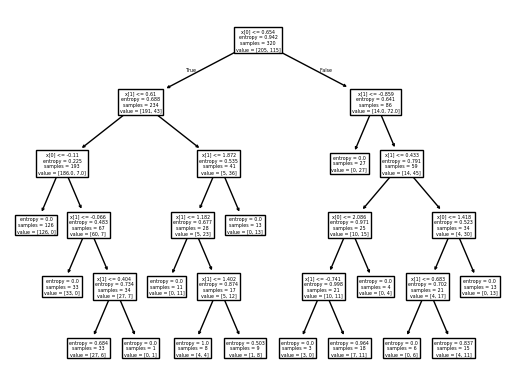

In [18]:
plot_tree(dtc)
plt.show()

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


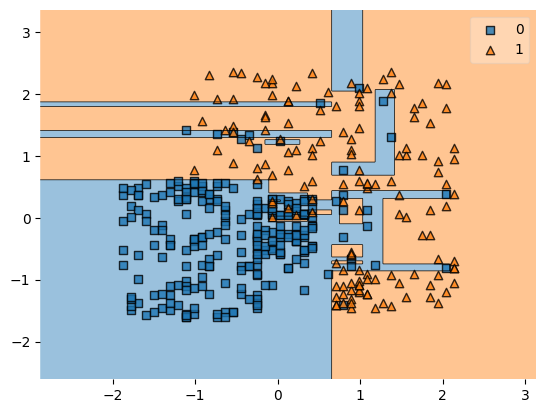

In [12]:
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=dtc)
plt.show()

In [23]:
#post Pruning
for i in range(1,10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(x_train,y_train)
    print(i,dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100)


1 82.1875 90.0
2 91.875 91.25
3 91.875 91.25
4 93.125 91.25
5 93.4375 90.0
6 95.0 86.25
7 96.875 85.0
8 97.1875 85.0
9 98.125 85.0


C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

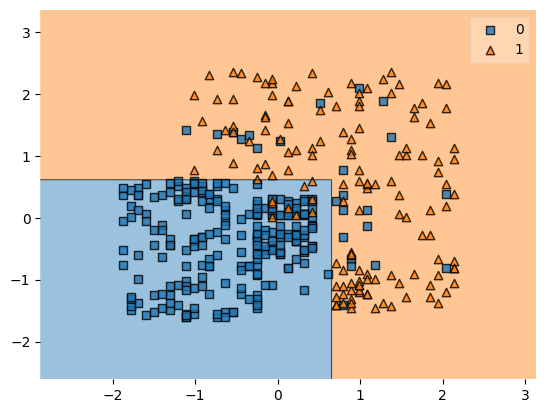

In [26]:
dt= DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)

In [27]:
dt.predict([[36,33000]])

C:\Users\VICTUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

DT for Regression

In [28]:
path = kh.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")
dataset = pd.read_csv(f"{path}/multiple_linear_regression_dataset.csv")
dataset.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


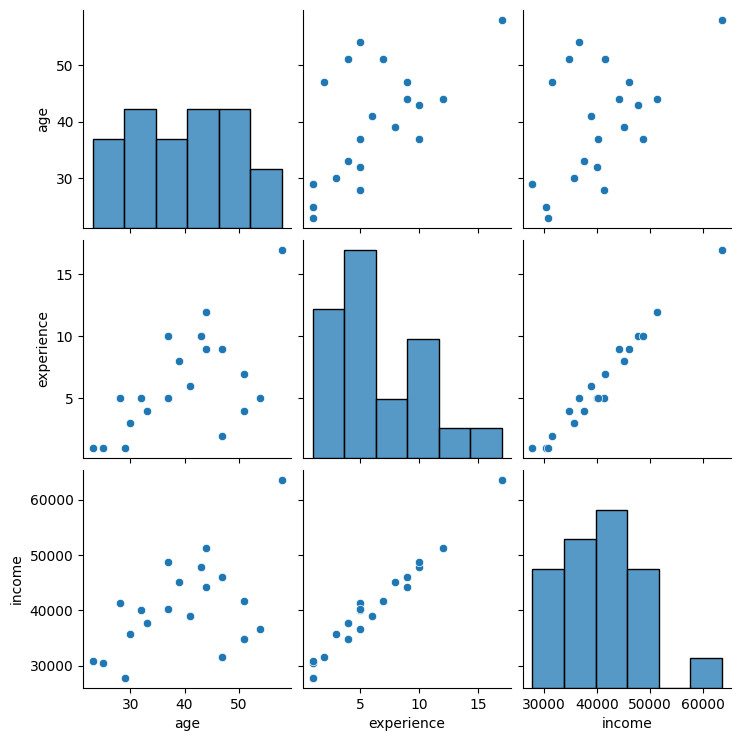

In [30]:
sns.pairplot(data=dataset)
plt.show()

In [54]:
# #Calculating perfect random state

# a = dataset.iloc[:,:-1]
# b = dataset["income"]
# for i in range (1,100):
#     a_train,a_test,b_train ,b_test = train_test_split(a,b,test_size=.2, random_state=i)
#     print(i)
#     dtr = DecisionTreeRegressor(max_depth=2)
# dtr.fit(a_train,b_train)
# print(dtr.score(a_train,b_train)*100 , dtr.score(a_test,b_test)*100)

In [ ]:
a = dataset.iloc[:,:-1]
b = dataset["income"]

a_train,a_test,b_train ,b_test = train_test_split(a,b,test_size=.2, random_state=2)


In [ ]:
# Calculating perfect Max Depth

# for i in range(1,10):
#     dtr = DecisionTreeRegressor(max_depth= i)
#     dtr.fit(a_train,b_train)
#     print(i , dtr.score(a_train,b_train)*100 , dtr.score(a_test,b_test)*100)

1 62.27475334975008 49.275490022497934
2 93.47008949261631 90.27104722180901
3 98.508339892652 87.88099315364684
4 99.57638898637042 84.66587098135675
5 99.92391875095508 94.81235318741157
6 99.9993837264759 84.09858195039767
7 100.0 90.54554260548885
8 100.0 84.09858195039767
9 100.0 84.29962049270219


In [65]:
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(a_train,b_train)
print(dtr.score(a_train,b_train)*100 , dtr.score(a_test,b_test)*100)

93.47008949261631 90.27104722180901


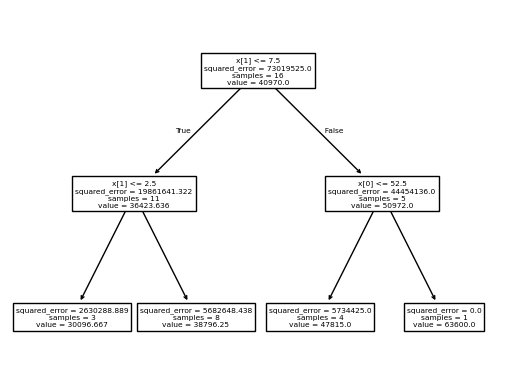

In [66]:
plot_tree(dtr)
plt.show()